# Antoine's

In [1]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import sklearn.linear_model as lm
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
from matplotlib.widgets import Slider
warnings.filterwarnings('ignore')

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import math

import geopandas
import json
import urllib

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter
from bokeh.palettes import brewer

from bokeh.io.doc import curdoc
from bokeh.models import Slider, HoverTool, Select
from bokeh.layouts import widgetbox, row, column

# Part 1: Introduction

## Figure 1: Partisanship by state

In [3]:
states = [['AZ','Republican'], ['TX', 'Republican'], ['SC', 'Republican'],['CA', 'Democrat'], ['IL', 'Democrat'], ['CT', 'Democrat']]
df_states = pd.DataFrame(states,columns = ['state', 'partisanship'])
df_states


import plotly.express as px  # Be sure to import express
fig = px.choropleth(df_states,  # Input Pandas DataFrame
                    locations="state",  # DataFrame column with locations
                    color="partisanship",  # DataFrame column with color values
                    hover_name="partisanship", #what displays when pointing on a state
                    locationmode = 'USA-states',
                    color_discrete_map={'Republican' : 'red', 'Democrat' : 'blue'}) # Set to plot as US States
fig.update_layout(
    title_text = 'State Partizanship', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
plotly.offline.plot(fig, filename='state.html')

'state.html'

In [4]:
df_states

,state,partisanship
0,AZ,Republican
1,TX,Republican
2,SC,Republican
3,CA,Democrat
4,IL,Democrat
5,CT,Democrat


### Map USA pour 3 races: nbr de stops

In [27]:
df_stops = pd.read_csv('Number_Stops.csv')


In [28]:
df_stops.drop(columns = ['Unnamed: 0'], inplace = True)

In [29]:
#AZ : 6.73 mi
#CT : 3.59 mi 
#SC : 4.82 mi
#CA : 38.6 mi 
#TX : 27 mi 
#IL : 12.88 mi

coefficient = 0

for index, state in enumerate(df_stops.State.values):
    
    if state == 'AZ':
        coefficient = 6.73e6
        
        if df_stops.iloc[index]['subject_race'] == 'white': coefficient *= 0.541
        if df_stops.iloc[index]['subject_race'] == 'hispanic': coefficient *= 0.317
        if df_stops.iloc[index]['subject_race'] == 'black': coefficient *= 0.052
            
        df_stops.loc[index, 'count'] = df_stops.iloc[index]['count']/coefficient
        
        coefficient = 0
        
    
    if state == 'CT':
        coefficient = 3.59e6
        
        if df_stops.iloc[index]['subject_race'] == 'white': coefficient *= 0.659
        if df_stops.iloc[index]['subject_race'] == 'hispanic': coefficient *= 0.169
        if df_stops.iloc[index]['subject_race'] == 'black': coefficient *= 0.122
        
        df_stops.loc[index, 'count'] = df_stops.iloc[index]['count']/coefficient
        
        coefficient = 0
    
    if state == 'SC':
        coefficient = 4.82e6
        
        if df_stops.iloc[index]['subject_race'] == 'white': coefficient *= 0.637
        if df_stops.iloc[index]['subject_race'] == 'hispanic': coefficient *= 0.06
        if df_stops.iloc[index]['subject_race'] == 'black': coefficient *= 0.27
    
        df_stops.loc[index, 'count'] = df_stops.iloc[index]['count']/coefficient
        
        coefficient = 0
    
    if state == 'CA':
        coefficient = 38.6e6
        
        if df_stops.iloc[index]['subject_race'] == 'white': coefficient *= 0.365
        if df_stops.iloc[index]['subject_race'] == 'hispanic': coefficient *= 0.394
        if df_stops.iloc[index]['subject_race'] == 'black': coefficient *= 0.065
            
        df_stops.loc[index, 'count'] = df_stops.iloc[index]['count']/coefficient
        
        coefficient = 0
    
    if state == 'TX':
        coefficient = 27e6
        
        if df_stops.iloc[index]['subject_race'] == 'white': coefficient *= 0.412
        if df_stops.iloc[index]['subject_race'] == 'hispanic': coefficient *= 0.397
        if df_stops.iloc[index]['subject_race'] == 'black': coefficient *= 0.129
            
        df_stops.loc[index, 'count'] = df_stops.iloc[index]['count']/coefficient
        
        coefficient = 0
    
    if state == 'IL':
        coefficient = 12.88e6
        
        if df_stops.iloc[index]['subject_race'] == 'white': coefficient *= 0.608
        if df_stops.iloc[index]['subject_race'] == 'hispanic': coefficient *= 0.175
        if df_stops.iloc[index]['subject_race'] == 'black': coefficient *= 0.146
            
        df_stops.loc[index, 'count'] = df_stops.iloc[index]['count']/coefficient
        
        coefficient = 0

df_stops['count'] = df_stops['count']*100
df_stops.sort_values(by='subject_race')

,subject_race,State,count
0,black,AZ,16.573037
15,black,IL,40.206543
3,black,SC,39.627785
6,black,TX,10.235458
9,black,CA,27.860462
12,black,CT,36.979771
1,hispanic,AZ,12.255403
4,hispanic,SC,21.803942
7,hispanic,TX,12.376947
16,hispanic,IL,23.226886


In [38]:
races = ['black', 'hispanic', 'white']

data = []

for race in races:
    
    data.append(dict(type='choropleth',
                 locations = df_stops.loc[df_stops['subject_race']==race]['State'],
                 z=df_stops.loc[df_stops['subject_race']==race]['count'],
                 locationmode='USA-states',
                 colorscale = 'electric',
                 colorbar_title = "stops per 100 inhab",
                 zmin = np.min(df_stops['count'].values),
                 zmax = np.max(df_stops['count'].values)))

# let's create the steps for the slider
steps = []
for i, race in enumerate(races):
    step = dict(method='restyle',
                args=['visible', [False] * len(data)],
                label='race: {}'.format(race))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=2,
                pad={"t": 1},
                steps=steps)]    
layout = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=sliders,
             title = "stops counts per 100 inhabitants")

fig = dict(data=data, 
           layout=layout)

plotly.offline.iplot(fig)
plotly.offline.plot(fig, filename='StateStops_per_race.html')

'StateStops_per_race.html'

# Part 2: Analysis

### 1. First we need to prove that sex does not impact our analysis

### search rates map 

In [31]:
df = pd.read_csv('data_search_rates_interac.csv')
df

,date,subject_race,subject_sex,State,Partisanship,search_rates
0,2014-02-05,white,male,AZ,R,0.028441
1,2014-01-31,hispanic,male,AZ,R,0.048639
2,2014-02-02,white,female,AZ,R,0.017085
3,2014-05-25,hispanic,male,AZ,R,0.047571
4,2015-05-01,white,male,AZ,R,0.026005
...,...,...,...,...,...,...
1799995,2015-09-30,black,female,IL,D,0.044802
1799996,2014-08-14,white,female,IL,D,0.021855
1799997,2015-09-16,white,male,IL,D,0.033543
1799998,2014-04-16,white,female,IL,D,0.022386


In [34]:
partisanship = []

for state in df['State'].values:
    
    if (state == 'SC'):
        
        partisanship.append('Republican')
        
    elif (state == 'TX'):
        
        partisanship.append('Republican')
    
    elif (state=='IL'):
        
        partisanship.append('Democrat')
        
    elif (state == 'CA'):
        
        partisanship.append('Democrat')
    
    elif (state == 'CT'):
        
        partisanship.append('Democrat')
    
    elif (state == 'AZ'):
        
        partisanship.append('Republican')
    
df['Partizanship'] = partisanship
df

,date,subject_race,subject_sex,State,Partisanship,search_rates,Partizanship
0,2014-02-05,white,male,AZ,R,0.028441,Republican
1,2014-01-31,hispanic,male,AZ,R,0.048639,Republican
2,2014-02-02,white,female,AZ,R,0.017085,Republican
3,2014-05-25,hispanic,male,AZ,R,0.047571,Republican
4,2015-05-01,white,male,AZ,R,0.026005,Republican
...,...,...,...,...,...,...,...
1799995,2015-09-30,black,female,IL,D,0.044802,Democrat
1799996,2014-08-14,white,female,IL,D,0.021855,Democrat
1799997,2015-09-16,white,male,IL,D,0.033543,Democrat
1799998,2014-04-16,white,female,IL,D,0.022386,Democrat


We now have a data frame that has partisanship and search rates.

In [37]:
df.loc[df['subject_race']=='black'].groupby(by='State').mean()

,search_rates
State,
AZ,0.037820
CA,0.067914
CT,0.067912
IL,0.066509
SC,0.036291
TX,0.037099


#### Nous on va regarder la difference relative par etat, puis par partizanship:

In [41]:
races = ['black', 'hispanic']

data = []

for race in races:
    
    data.append(dict(type='choropleth',
                 locations = df_stops.loc[df_stops['subject_race']==race]['State'],
                 z=df_stops.loc[df_stops['subject_race']==race]['count'],
                 locationmode='USA-states',
                 colorscale = 'electric',
                 colorbar_title = "stops per 100 inhab",
                 zmin = np.min(df_stops['count'].values),
                 zmax = np.max(df_stops['count'].values)))

# let's create the steps for the slider
steps = []
for i, race in enumerate(races):
    step = dict(method='restyle',
                args=['visible', [False] * len(data)],
                label='race: {}'.format(race))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=2,
                pad={"t": 1},
                steps=steps)]    
layout = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=sliders,
             title = "stops counts per 100 inhabitants")

fig = dict(data=data, 
           layout=layout)

plotly.offline.iplot(fig)
plotly.offline.plot(fig, filename='StateStops_per_race.html')

'StateStops_per_race.html'

In [5]:
whites_ = df.loc[df['subject_race'] == 'white']
blacks_ = df.loc[df['subject_race'] == 'black']
hispanics_ = df.loc[df['subject_race'] == 'hispanic']

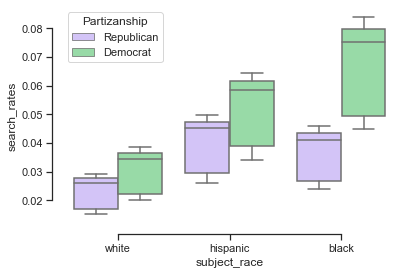

In [6]:
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="subject_race", y="search_rates",
            hue="Partizanship", palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

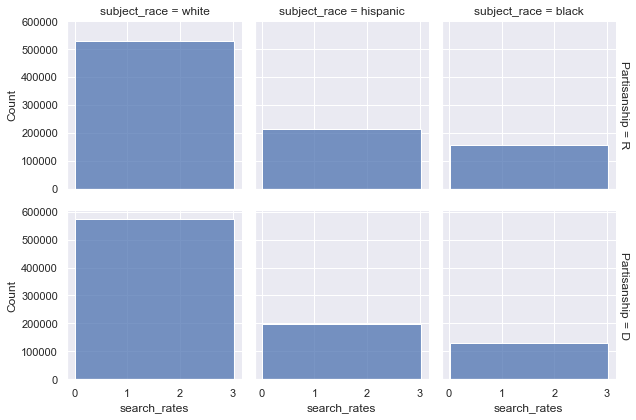

In [13]:
sns.set_theme(style="darkgrid")
sns.displot(
    df, x="search_rates", col="subject_race", row="Partisanship",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

In [8]:
def bootstrap_CI(data, nbr_draws=1000):
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)

    return [np.nanpercentile(means, 2.5),np.nanpercentile(means, 97.5)]

## Lets use confidence intervals

In [39]:
CI_black_republican = bootstrap_CI(blacks_.loc[blacks_['Partizanship']=='Republican']['search_rates'].values)
CI_white_republican = bootstrap_CI(whites_.loc[whites_['Partizanship']=='Republican']['search_rates'].values)
CI_hispanic_republican = bootstrap_CI(hispanics_.loc[hispanics_['Partizanship']=='Republican']['search_rates'].values)

CI_black_democrats = bootstrap_CI(blacks_.loc[blacks_['Partizanship']=='Democrat']['search_rates'].values)
CI_white_democrats = bootstrap_CI(whites_.loc[whites_['Partizanship']=='Democrat']['search_rates'].values)
CI_hispanic_democrats = bootstrap_CI(hispanics_.loc[hispanics_['Partizanship']=='Democrat']['search_rates'].values)

In [10]:
CI_black_republican

[0.03659879774391118, 0.036681418052306826]

In [11]:
CI_black_democrats

[0.06720306609579459, 0.06736528491917847]

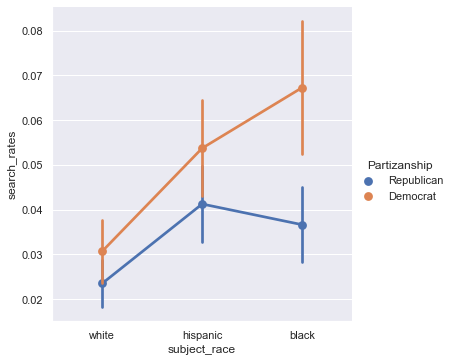

In [12]:
sns.catplot(x= "subject_race", y="search_rates", hue="Partizanship", kind="point", data=df, alpha = 0.5, ci = "sd")

## Relative difference

faire les bootstraps

In [26]:
df_R = df.loc[df['Partisanship']=='R'].groupby(by='subject_race').mean().reset_index()
df_D = df.loc[df['Partisanship']=='D'].groupby(by='subject_race').mean().reset_index()

In [27]:
df_R

,subject_race,search_rates
0,black,0.036640
1,hispanic,0.041265
2,white,0.023500


In [29]:
df_D.iloc[0].search_rates

0.06728760110100895

In [31]:
black_white_D = df_D.iloc[0].search_rates/df_D.iloc[2].search_rates
black_white_R = df_R.iloc[0].search_rates/df_R.iloc[2].search_rates
hispanic_white_D = df_D.iloc[1].search_rates/df_D.iloc[2].search_rates
hispanic_white_R = df_R.iloc[1].search_rates/df_R.iloc[2].search_rates

2.1925258152290934

faire avec un hue

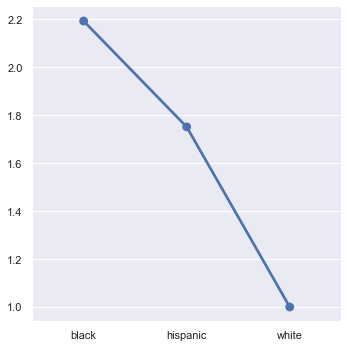

In [37]:

sns.catplot(x= ['black','hispanic','white'], y=[black_white_D,hispanic_white_D,1], kind="point", data=df, alpha = 0.4)


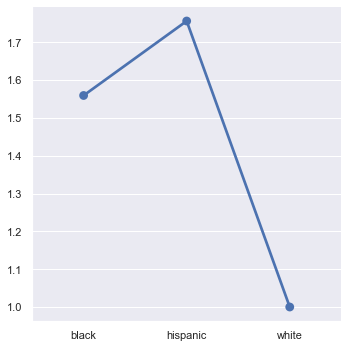

In [38]:
sns.catplot(x= ['black','hispanic','white'], y=[black_white_R,hispanic_white_R,1], kind="point", data=df, alpha = 0.5)

### la suite: 

- faire timewise
- dupliquer sans interaction (demander assistante le mieux) 